-------------------------------------------------------------
Libs e Preparação do ambiente Spark
-------------------------------------------------------------



In [1]:
# Java jdk utilitários 
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [2]:
#Download do Spark
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz

# Descompactando os arquivos
!tar xf spark-3.1.2-bin-hadoop2.7.tgz

In [3]:
# Importando a biblioteca os
import os

# Definindo a variável de ambiente do Java
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

# Definindo a variável de ambiente do Spark
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

In [4]:
# Findspark
!pip install -q findspark

In [5]:
import findspark

# Iniciando o findspark
findspark.init()

In [6]:
# iniciar uma seção Spark
from pyspark.sql import SparkSession

# iniciando o spark context
spark = SparkSession.builder.master('local[*]').getOrCreate()
spark



```
# Isto está formatado como código
```

# Operações simples 
Uso do JOIN

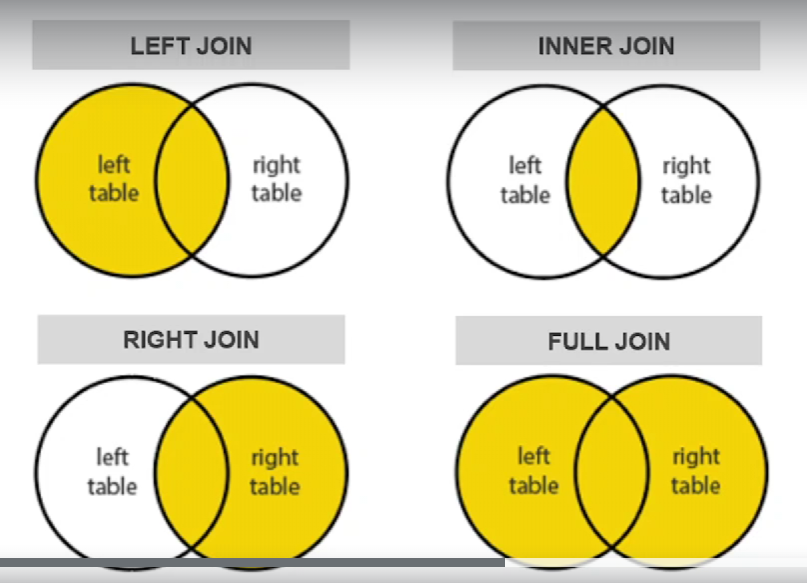

In [7]:
from pyspark.sql import SparkSession
from pyspark.sql.types import ArrayType, StructField, StructType, StringType, IntegerType

In [13]:
# ARQUIVOS 

profissional = spark.sparkContext.textFile("/content/Profissionais.txt")
salario = spark.sparkContext.textFile("/content/Salario.txt")


In [14]:
profissional.collect()

['Carlos,oncologista,hospital',
 'Ana,dentista,clinica',
 'Fernanda,enfermeira,hospital',
 'Sandra,pediatra,clinica',
 'Fatima,dentista,clinica',
 'Gilmar,cardiologista,hospital',
 'Fabio,pediatra,clinica',
 'Hilton,enfermeiro,clinica',
 'Daiane,dentista,clinica',
 'Paulo,farmaceutico,clinica',
 'Gilberto,pediatra,hospital']

In [15]:
salario.collect()

['Carlos,10000',
 'Ana,7000',
 'Fernanda,5000',
 'Sandra,6000',
 'Fatima,8500',
 'Gilmar,9000',
 'Fabio,12000',
 'Hilton,5000',
 'Jefferson,8000',
 'Antonio,3000',
 'Joaquim,5000']

In [16]:
#Separar os dados conforme os index de cada elemento (tb começa em 0)

profissional_ajuste=profissional.map(lambda x:(x.split(",")[0],(x.split(",")[1],x.split(",")[2])))
profissional_ajuste.collect()

[('Carlos', ('oncologista', 'hospital')),
 ('Ana', ('dentista', 'clinica')),
 ('Fernanda', ('enfermeira', 'hospital')),
 ('Sandra', ('pediatra', 'clinica')),
 ('Fatima', ('dentista', 'clinica')),
 ('Gilmar', ('cardiologista', 'hospital')),
 ('Fabio', ('pediatra', 'clinica')),
 ('Hilton', ('enfermeiro', 'clinica')),
 ('Daiane', ('dentista', 'clinica')),
 ('Paulo', ('farmaceutico', 'clinica')),
 ('Gilberto', ('pediatra', 'hospital'))]

In [17]:
#realizando o mapeamento dos campos sobre salario (tem apenas 3 colunas)
salario_ajuste=salario.map(lambda x:(x.split(",")[0],x.split(",")[1]))

In [19]:
# Realizando a operacao de join, que significa a busca de todas as informacoes no RDD
# profissional e que exista no RDD salario
#dados iguais nos dois rdds

folha_pagamento_join=profissional_ajuste.join(salario_ajuste)
folha_pagamento_join.collect()

[('Carlos', (('oncologista', 'hospital'), '10000')),
 ('Gilmar', (('cardiologista', 'hospital'), '9000')),
 ('Fatima', (('dentista', 'clinica'), '8500')),
 ('Fabio', (('pediatra', 'clinica'), '12000')),
 ('Ana', (('dentista', 'clinica'), '7000')),
 ('Fernanda', (('enfermeira', 'hospital'), '5000')),
 ('Sandra', (('pediatra', 'clinica'), '6000')),
 ('Hilton', (('enfermeiro', 'clinica'), '5000'))]

In [20]:
# Realizando a operacao de left, que significa a busca de todos RDD
# profissional e que exista ou nao no RDD salario
folha_pagamento_join=profissional_ajuste.leftOuterJoin(salario_ajuste)
folha_pagamento_join.collect()

[('Carlos', (('oncologista', 'hospital'), '10000')),
 ('Gilmar', (('cardiologista', 'hospital'), '9000')),
 ('Fatima', (('dentista', 'clinica'), '8500')),
 ('Fabio', (('pediatra', 'clinica'), '12000')),
 ('Gilberto', (('pediatra', 'hospital'), None)),
 ('Daiane', (('dentista', 'clinica'), None)),
 ('Ana', (('dentista', 'clinica'), '7000')),
 ('Fernanda', (('enfermeira', 'hospital'), '5000')),
 ('Sandra', (('pediatra', 'clinica'), '6000')),
 ('Hilton', (('enfermeiro', 'clinica'), '5000')),
 ('Paulo', (('farmaceutico', 'clinica'), None))]

In [21]:
# salario e que exista ou nao no RDD profissional

folha_pagamento_join=profissional_ajuste.rightOuterJoin(salario_ajuste)
folha_pagamento_join.collect()

[('Carlos', (('oncologista', 'hospital'), '10000')),
 ('Gilmar', (('cardiologista', 'hospital'), '9000')),
 ('Fatima', (('dentista', 'clinica'), '8500')),
 ('Fabio', (('pediatra', 'clinica'), '12000')),
 ('Joaquim', (None, '5000')),
 ('Antonio', (None, '3000')),
 ('Ana', (('dentista', 'clinica'), '7000')),
 ('Fernanda', (('enfermeira', 'hospital'), '5000')),
 ('Sandra', (('pediatra', 'clinica'), '6000')),
 ('Hilton', (('enfermeiro', 'clinica'), '5000')),
 ('Jefferson', (None, '8000'))]